In [32]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_validate
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## 1.导入数据

### 1.1 读入数据

In [33]:
# 导入
df_train_feature = pd.read_csv("Dataset/train_feature.csv")
df_train_label = pd.read_csv("Dataset/train_label.csv")
df_test_feature = pd.read_csv("Dataset/test_feature.csv")
# 显示
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
# 合并
df_train = pd.concat([df_train_feature,df_train_label],axis=1)

### 1.2基本信息

In [34]:
df_train.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 121 columns):
 #    Column       Non-Null Count  Dtype  
---   ------       --------------  -----  
 0    feature_0    9960 non-null   float64
 1    feature_1    9946 non-null   float64
 2    feature_2    9955 non-null   float64
 3    feature_3    9952 non-null   float64
 4    feature_4    9954 non-null   float64
 5    feature_5    9955 non-null   float64
 6    feature_6    9956 non-null   float64
 7    feature_7    9956 non-null   float64
 8    feature_8    9935 non-null   float64
 9    feature_9    9954 non-null   float64
 10   feature_10   9941 non-null   float64
 11   feature_11   9944 non-null   float64
 12   feature_12   9947 non-null   float64
 13   feature_13   9940 non-null   float64
 14   feature_14   9930 non-null   float64
 15   feature_15   9951 non-null   float64
 16   feature_16   9945 non-null   float64
 17   feature_17   9950 non-null   float64
 18   feature_18   9955 non-nul

In [35]:
df_test_feature.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 120 columns):
 #    Column       Non-Null Count  Dtype  
---   ------       --------------  -----  
 0    feature_0    2989 non-null   float64
 1    feature_1    2978 non-null   float64
 2    feature_2    2986 non-null   float64
 3    feature_3    2993 non-null   float64
 4    feature_4    2982 non-null   float64
 5    feature_5    2988 non-null   float64
 6    feature_6    2978 non-null   float64
 7    feature_7    2985 non-null   float64
 8    feature_8    2985 non-null   float64
 9    feature_9    2985 non-null   float64
 10   feature_10   2982 non-null   float64
 11   feature_11   2985 non-null   float64
 12   feature_12   2981 non-null   float64
 13   feature_13   2984 non-null   float64
 14   feature_14   2985 non-null   float64
 15   feature_15   2988 non-null   float64
 16   feature_16   2983 non-null   float64
 17   feature_17   2982 non-null   float64
 18   feature_18   2989 non-null

In [36]:
df_train.sample(5)

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,feature_80,feature_81,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100,feature_101,feature_102,feature_103,feature_104,feature_105,feature_106,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119,label
374,49.0,0.811851,0.052588,9.0,6.0,800448.0,54.0,9.0,1.0,3.856229,2.0,2.377574,5.0,9.0,5.0,68.0,0.014943,2.678985,1.0,1.069708,0.932776,1.186052,1.0,4.0,1.0,3.0,6.131937,9.0,21.8,3.222999,4.341009,0.773019,0.902253,2.250439,0.461335,4.258996,2.0,132.0,3.0,-2.414322,0.501039,-1.062291,1.0,1.529124,18.0,-1.492857,0.224700,2.415061,3.180887,3.065917,56.3,1.961873,1.192033,0.017277,54.0,52.0,1.747584,1.0,1.097624,-0.445890,0.738862,0.0,4.0,1.0,0.618571,10.039497,0.441927,0.281379,1.0,22.4,41.0,8.0,2.0,0.0,1.039916,33.0,2.0,0.747660,4.0,3.0,1.511091,36.0,5.0,7.0,77.0,0.525294,2.835590,58.0,1.0,26.0,8.0,0.232696,157.5,1.0,9.0,9.536826,9.0,65.0,3.0,1.491224,3.613702,2.767482,0.046451,2.0,2.005763,3.0,6.0,28.4,3.942250,52.0,1.0,0.020794,55.0,0.078052,1.605904,1.0,57.0,2.175882,3.0,50.0,3
6307,39.0,-15.609680,0.464945,7.0,7.0,195.0,48.0,7.0,5.0,8.204656,0.0,-1.709697,4.0,5.0,4.0,56.0,0.156751,2.345119,2.0,2.111173,0.687325,2.728328,1.0,3.0,4.0,4.0,1.310030,7.0,10.8,5.934906,3.890001,0.408320,0.779204,3.918534,0.757359,1.334467,2.0,150.0,1.0,3.032549,-13.405349,-1.031610,3.0,2.364642,3.0,5.333018,0.197928,0.930140,0.179005,4.841180,66.0,0.037371,0.084345,4.388606,51.0,30.0,7.053237,2.0,0.194208,0.133748,1.616493,25.0,6.0,2.0,0.391134,0.983342,2.284207,2.344538,2.0,32.7,46.0,8.0,0.0,1.0,0.422715,20.0,18.0,0.653192,5.0,2.0,1.031261,62.0,4.0,9.0,68.0,0.107065,0.583009,49.0,3.0,41.0,7.0,0.218412,164.7,1.0,9.0,12.623939,9.0,69.0,1.0,4.648709,2.352856,9.125941,0.903298,3.0,2.750798,3.0,2.0,20.5,4.061393,49.0,6.0,0.027991,47.0,0.198732,13.253759,5.0,52.0,1.864843,1.0,42.0,0
8111,46.0,17.230443,0.674692,7.0,7.0,659300.0,45.0,10.0,1.0,3.756864,0.0,-4.896679,11.0,9.0,5.0,4.0,0.221261,0.187469,1.0,2.211854,0.034320,1.908418,1.0,2.0,2.0,3.0,1.108571,5.0,23.9,2.426349,-5.115027,0.085469,0.051426,3.048142,1.129133,1.656671,3.0,113.0,1.0,1.626418,5.410329,-0.639692,1.0,1.851019,9.0,-3.948749,1.093881,6.772935,0.022080,6.064458,51.1,0.666953,1.116210,2.568676,54.0,33.0,4.492070,1.0,1.143140,1.549265,-7.749050,26.0,7.0,2.0,0.857435,0.720454,0.527450,4.407474,1.0,26.3,56.0,9.0,3.0,0.0,5.067676,30.0,34.0,0.591807,4.0,NaN,6.336417,22.0,1.0,9.0,69.0,0.561517,0.619733,12.0,8.0,48.0,9.0,0.069425,154.0,2.0,9.0,0.360595,10.0,35.0,6.0,2.131534,4.792520,1.494114,0.771012,11.0,1.095704,1.0,1.0,26.0,2.729532,58.0,2.0,1.253059,66.0,0.796191,1.340445,2.0,57.0,1.237383,1.0,64.0,1
2834,38.0,11.246557,0.294863,5.0,5.0,110.0,47.0,7.0,2.0,3.272263,1.0,4.462688,38.0,8.0,2.0,42.0,0.041603,2.303665,1.0,4.949729,0.305437,0.125164,1.0,1.0,3.0,0.0,2.173658,7.0,4.0,2.818862,-6.145244,0.153561,0.829897,3.014274,0.698477,1.900180,2.0,122.0,2.0,-1.247376,-0.809562,0.8557

In [37]:
df_train.describe()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,feature_80,feature_81,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100,feature_101,feature_102,feature_103,feature_104,feature_105,feature_106,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119,label
count,9960.000000,9946.000000,9955.000000,9952.000000,9954.000000,9.955000e+03,9956.000000,9956.000000,9935.000000,9954.000000,9941.000000,9944.000000,9947.000000,9940.000000,9930.000000,9951.000000,9945.000000,9950.000000,9955.000000,9959.000000,9956.000000,9948.000000,9963.000000,9947.000000,9952.000000,9957.000000,9949.000000,9939.000000,9948.000000,9948.000000,9946.000000,9962.000000,9955.000000,9949.000000,9945.000000,9950.000000,9958.000000,9.961000e+03,9946.000000,9948.000000,9957.000000,9951.000000,9941.000000,9952.000000,9950.000000,9952.000000,9962.000000,9955.000000,9952.000000,9938.000000,9972.000000,9951.000000,9947.000000,9940.000000,9953.000000,9950.000000,9956.000000,9947.000000,9941.000000,9945.000000,9952.000000,9944.000000,9954.000000,9948.000000,9951.000000,9956.000000,9947.000000,9953.000000,9949.000000,9953.000000,9953.000000,9960.000000,9950.000000,9953.000000,9955.000000,9953.000000,9958.000000,9946.000000,9951.000000,9945.000000,9953.000000,9952.000000,9956.000000,9947.000000,9954.000000,9946.000000,9946.000000,9955.000000,9956.000000,9945.000000,9957.000000,9953.000000,9.947000e+03,9938.000000,9942.000000,9948.000000,9946.000000,9961.000000,9937.000000,9951.000000,9954.000000,9943.000000,9952.000000,9957.000000,9952.000000,9941.000000,9944.000000,9947.000000,9946.000000,9935.000000,9951.000000,9942.000000,9949.000000,9953.000000,9971.000000,9954.000000,9966.000000,9945.000000,9961.000000,9955.000000,10000.000000
mean,1381.896486,58.715384,11.157463,215.609224,104.244826,5.159948e+03,1418.185014,193.551326,49.467136,228.066855,64.809074,-9.068853,536.758219,229.387123,106.615106,1482.809064,18.120943,95.052449,80.681567,117.779420,17.637237,27.097471,89.579845,62.295667,104.238043,107.530180,116.829711,191.079485,348.842083,126.782439,14.122477,11.853086,13.574826,64.543680,29.538294,134.083742,55.755272,3.187351e+03,49.324553,15.109138,2.374575,2.181082,51.469671,144.835018,292.107839,-9.390437,29.950437,148.899285,66.445538,137.017457,1559.424593,94.834981,27.704791,69.053485,1208.541646,881.528543,111.154470,71.135317,35.475778,3.036871,9.160012,536.543443,144.561784,47.735123,45.139293,89.524080,37.954329,159.302570,96.317117,1580.602936,1350.022908,172.853614,50.184322,11.803175,49.076969,502.613383,706.855593,12.808915,112.343885,59.252589,120.830574,914.176246,142.369024,308.510204,2643.829707,13.583937,71.504410,1302.248820,100.755123,1258.748517,211.608115,24.720115,4.713032e+03,52.910747,175.268960,114.874600,177.833702,1438.000904,78.245648,120.067710,154.696440,135.128474,18.876886,99.469519,44.731531,92.916608,122.358709,565.625146,130.055945,1734.109210,116.686062,27.416274,153

In [38]:
df_test_feature.describe()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,feature_80,feature_81,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100,feature_101,feature_102,feature_103,feature_104,feature_105,feature_106,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119
count,2989.000000,2978.000000,2986.000000,2993.000000,2982.000000,2.988000e+03,2978.000000,2985.000000,2985.000000,2985.000000,2982.000000,2985.000000,2981.000000,2984.000000,2985.000000,2988.000000,2983.000000,2982.000000,2989.000000,2984.000000,2982.000000,2978.000000,2983.000000,2982.000000,2982.000000,2987.000000,2984.000000,2985.000000,2983.000000,2984.000000,2988.000000,2982.000000,2985.000000,2985.000000,2983.000000,2990.000000,2988.000000,2.975000e+03,2985.000000,2981.000000,2983.000000,2990.000000,2982.000000,2982.000000,2985.00000,2982.000000,2976.000000,2991.000000,2993.000000,2990.000000,2983.000000,2988.000000,2988.000000,2989.000000,2981.000000,2987.000000,2982.000000,2988.000000,2987.000000,2986.000000,2990.000000,2986.000000,2992.000000,2985.000000,2991.000000,2991.000000,2983.000000,2982.000000,2987.000000,2985.000000,2987.000000,2983.000000,2974.000000,2986.000000,2987.000000,2984.000000,2986.000000,2981.000000,2987.000000,2982.000000,2986.000000,2982.000000,2984.000000,2984.000000,2989.000000,2989.000000,2989.000000,2988.000000,2983.000000,2975.000000,2982.000000,2981.000000,2.987000e+03,2986.000000,2978.000000,2987.000000,2978.000000,2984.000000,2987.000000,2979.000000,2979.000000,2986.000000,2979.000000,2985.000000,2984.000000,2984.000000,2991.000000,2981.000000,2979.000000,2983.000000,2986.000000,2985.000000,2985.000000,2983.000000,2980.000000,2993.000000,2987.000000,2985.000000,2996.000000,2979.000000
mean,1762.320843,91.910842,15.729200,265.862011,96.420188,4.984848e+03,1703.073875,255.758459,73.217755,109.578258,45.705567,14.983461,577.232808,197.948056,176.742044,669.629183,12.691927,32.991722,70.923720,96.058755,14.721481,18.935355,90.190412,134.484239,88.805164,111.786073,105.812356,156.204690,496.906534,121.652299,123.898779,8.585338,3.764767,31.349759,16.421552,131.340804,53.411312,2.072408e+03,69.346734,4.321304,45.101147,3.214260,26.368545,160.792659,411.01072,14.417937,22.036255,83.977422,61.092717,108.645425,1771.414234,88.350728,46.684336,69.887329,1603.656156,764.309006,109.746980,43.106091,31.275962,-1.837948,-137.251219,251.015070,106.413770,26.716583,159.908233,58.311553,14.653002,135.269682,77.086374,624.874369,1826.365919,225.707342,36.525219,13.290020,30.143407,353.117292,1003.834896,13.282468,84.021761,120.727700,149.729800,1474.856808,108.194705,230.766421,1637.853530,17.781286,30.399045,1589.316934,84.012068,1478.496471,225.996982,34.403700,6.573757e+03,48.710650,213.845534,120.914665,123.818670,1457.719169,72.839304,85.466359,243.731392,85.952125,8.657431,124.573199,37.374719,57.145777,104.679706,375.309098,192.534768,1075.025142,115.841929,27.497801,1803.299832,12.129278,107.

### 1.3 关键变量

In [39]:
df_train['label'].value_counts()

0    2523
1    2521
2    2500
3    2456
Name: label, dtype: int64

## 2.数据预处理

### 2.1 异常值

In [40]:
df_train.describe()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,feature_80,feature_81,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100,feature_101,feature_102,feature_103,feature_104,feature_105,feature_106,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119,label
count,9960.000000,9946.000000,9955.000000,9952.000000,9954.000000,9.955000e+03,9956.000000,9956.000000,9935.000000,9954.000000,9941.000000,9944.000000,9947.000000,9940.000000,9930.000000,9951.000000,9945.000000,9950.000000,9955.000000,9959.000000,9956.000000,9948.000000,9963.000000,9947.000000,9952.000000,9957.000000,9949.000000,9939.000000,9948.000000,9948.000000,9946.000000,9962.000000,9955.000000,9949.000000,9945.000000,9950.000000,9958.000000,9.961000e+03,9946.000000,9948.000000,9957.000000,9951.000000,9941.000000,9952.000000,9950.000000,9952.000000,9962.000000,9955.000000,9952.000000,9938.000000,9972.000000,9951.000000,9947.000000,9940.000000,9953.000000,9950.000000,9956.000000,9947.000000,9941.000000,9945.000000,9952.000000,9944.000000,9954.000000,9948.000000,9951.000000,9956.000000,9947.000000,9953.000000,9949.000000,9953.000000,9953.000000,9960.000000,9950.000000,9953.000000,9955.000000,9953.000000,9958.000000,9946.000000,9951.000000,9945.000000,9953.000000,9952.000000,9956.000000,9947.000000,9954.000000,9946.000000,9946.000000,9955.000000,9956.000000,9945.000000,9957.000000,9953.000000,9.947000e+03,9938.000000,9942.000000,9948.000000,9946.000000,9961.000000,9937.000000,9951.000000,9954.000000,9943.000000,9952.000000,9957.000000,9952.000000,9941.000000,9944.000000,9947.000000,9946.000000,9935.000000,9951.000000,9942.000000,9949.000000,9953.000000,9971.000000,9954.000000,9966.000000,9945.000000,9961.000000,9955.000000,10000.000000
mean,1381.896486,58.715384,11.157463,215.609224,104.244826,5.159948e+03,1418.185014,193.551326,49.467136,228.066855,64.809074,-9.068853,536.758219,229.387123,106.615106,1482.809064,18.120943,95.052449,80.681567,117.779420,17.637237,27.097471,89.579845,62.295667,104.238043,107.530180,116.829711,191.079485,348.842083,126.782439,14.122477,11.853086,13.574826,64.543680,29.538294,134.083742,55.755272,3.187351e+03,49.324553,15.109138,2.374575,2.181082,51.469671,144.835018,292.107839,-9.390437,29.950437,148.899285,66.445538,137.017457,1559.424593,94.834981,27.704791,69.053485,1208.541646,881.528543,111.154470,71.135317,35.475778,3.036871,9.160012,536.543443,144.561784,47.735123,45.139293,89.524080,37.954329,159.302570,96.317117,1580.602936,1350.022908,172.853614,50.184322,11.803175,49.076969,502.613383,706.855593,12.808915,112.343885,59.252589,120.830574,914.176246,142.369024,308.510204,2643.829707,13.583937,71.504410,1302.248820,100.755123,1258.748517,211.608115,24.720115,4.713032e+03,52.910747,175.268960,114.874600,177.833702,1438.000904,78.245648,120.067710,154.696440,135.128474,18.876886,99.469519,44.731531,92.916608,122.358709,565.625146,130.055945,1734.109210,116.686062,27.416274,153

In [41]:
Q1 = np.percentile(df_train['label'], 25)
print(Q1)

0.0


In [42]:
Q1 = np.percentile(df_train['feature_10'], 25)
print(Q1)

nan


In [43]:
df_train = df_train.fillna(df_train.median())

In [391]:
# 异常值
from collections import Counter #计算每个值的个数

def detect_outliers(df,n,features):
    outlier_indices = []
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col],75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index

        for index in outlier_list_col:
            df[col][index]=None
        outlier_indices.extend(outlier_list_col)

    # outlier_indices = Counter(outlier_indices)
    # multiple_outliers = list( k for k, v in outlier_indices.items() if v >= n )

    return df
    # return df,multiple_outliers

df_train = detect_outliers(df_train,1,df_train.columns.difference(['label']))

# Outliers_to_drop = detect_outliers(df_train,2,df_train.columns.difference(['label']))
# df_train_drop = df_train.drop(Outliers_to_drop,axis=0).reset_index(drop=True)

In [45]:
df_train.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 121 columns):
 #    Column       Non-Null Count  Dtype  
---   ------       --------------  -----  
 0    feature_0    9922 non-null   float64
 1    feature_1    9888 non-null   float64
 2    feature_2    9958 non-null   float64
 3    feature_3    8519 non-null   float64
 4    feature_4    9751 non-null   float64
 5    feature_5    9912 non-null   float64
 6    feature_6    9924 non-null   float64
 7    feature_7    8549 non-null   float64
 8    feature_8    9661 non-null   float64
 9    feature_9    9201 non-null   float64
 10   feature_10   9918 non-null   float64
 11   feature_11   9878 non-null   float64
 12   feature_12   9959 non-null   float64
 13   feature_13   8510 non-null   float64
 14   feature_14   9745 non-null   float64
 15   feature_15   9944 non-null   float64
 16   feature_16   9944 non-null   float64
 17   feature_17   9451 non-null   float64
 18   feature_18   9621 non-nul

In [167]:
df_train_count = pd.DataFrame(df_train.count(),columns=['num'])
df_train_count.sort_values(by='num')

,num
count,0
feature_83,8488
feature_13,8510
feature_3,8519
feature_90,8533
feature_96,8538
feature_27,8546
feature_7,8549
feature_71,8576
feature_94,8597


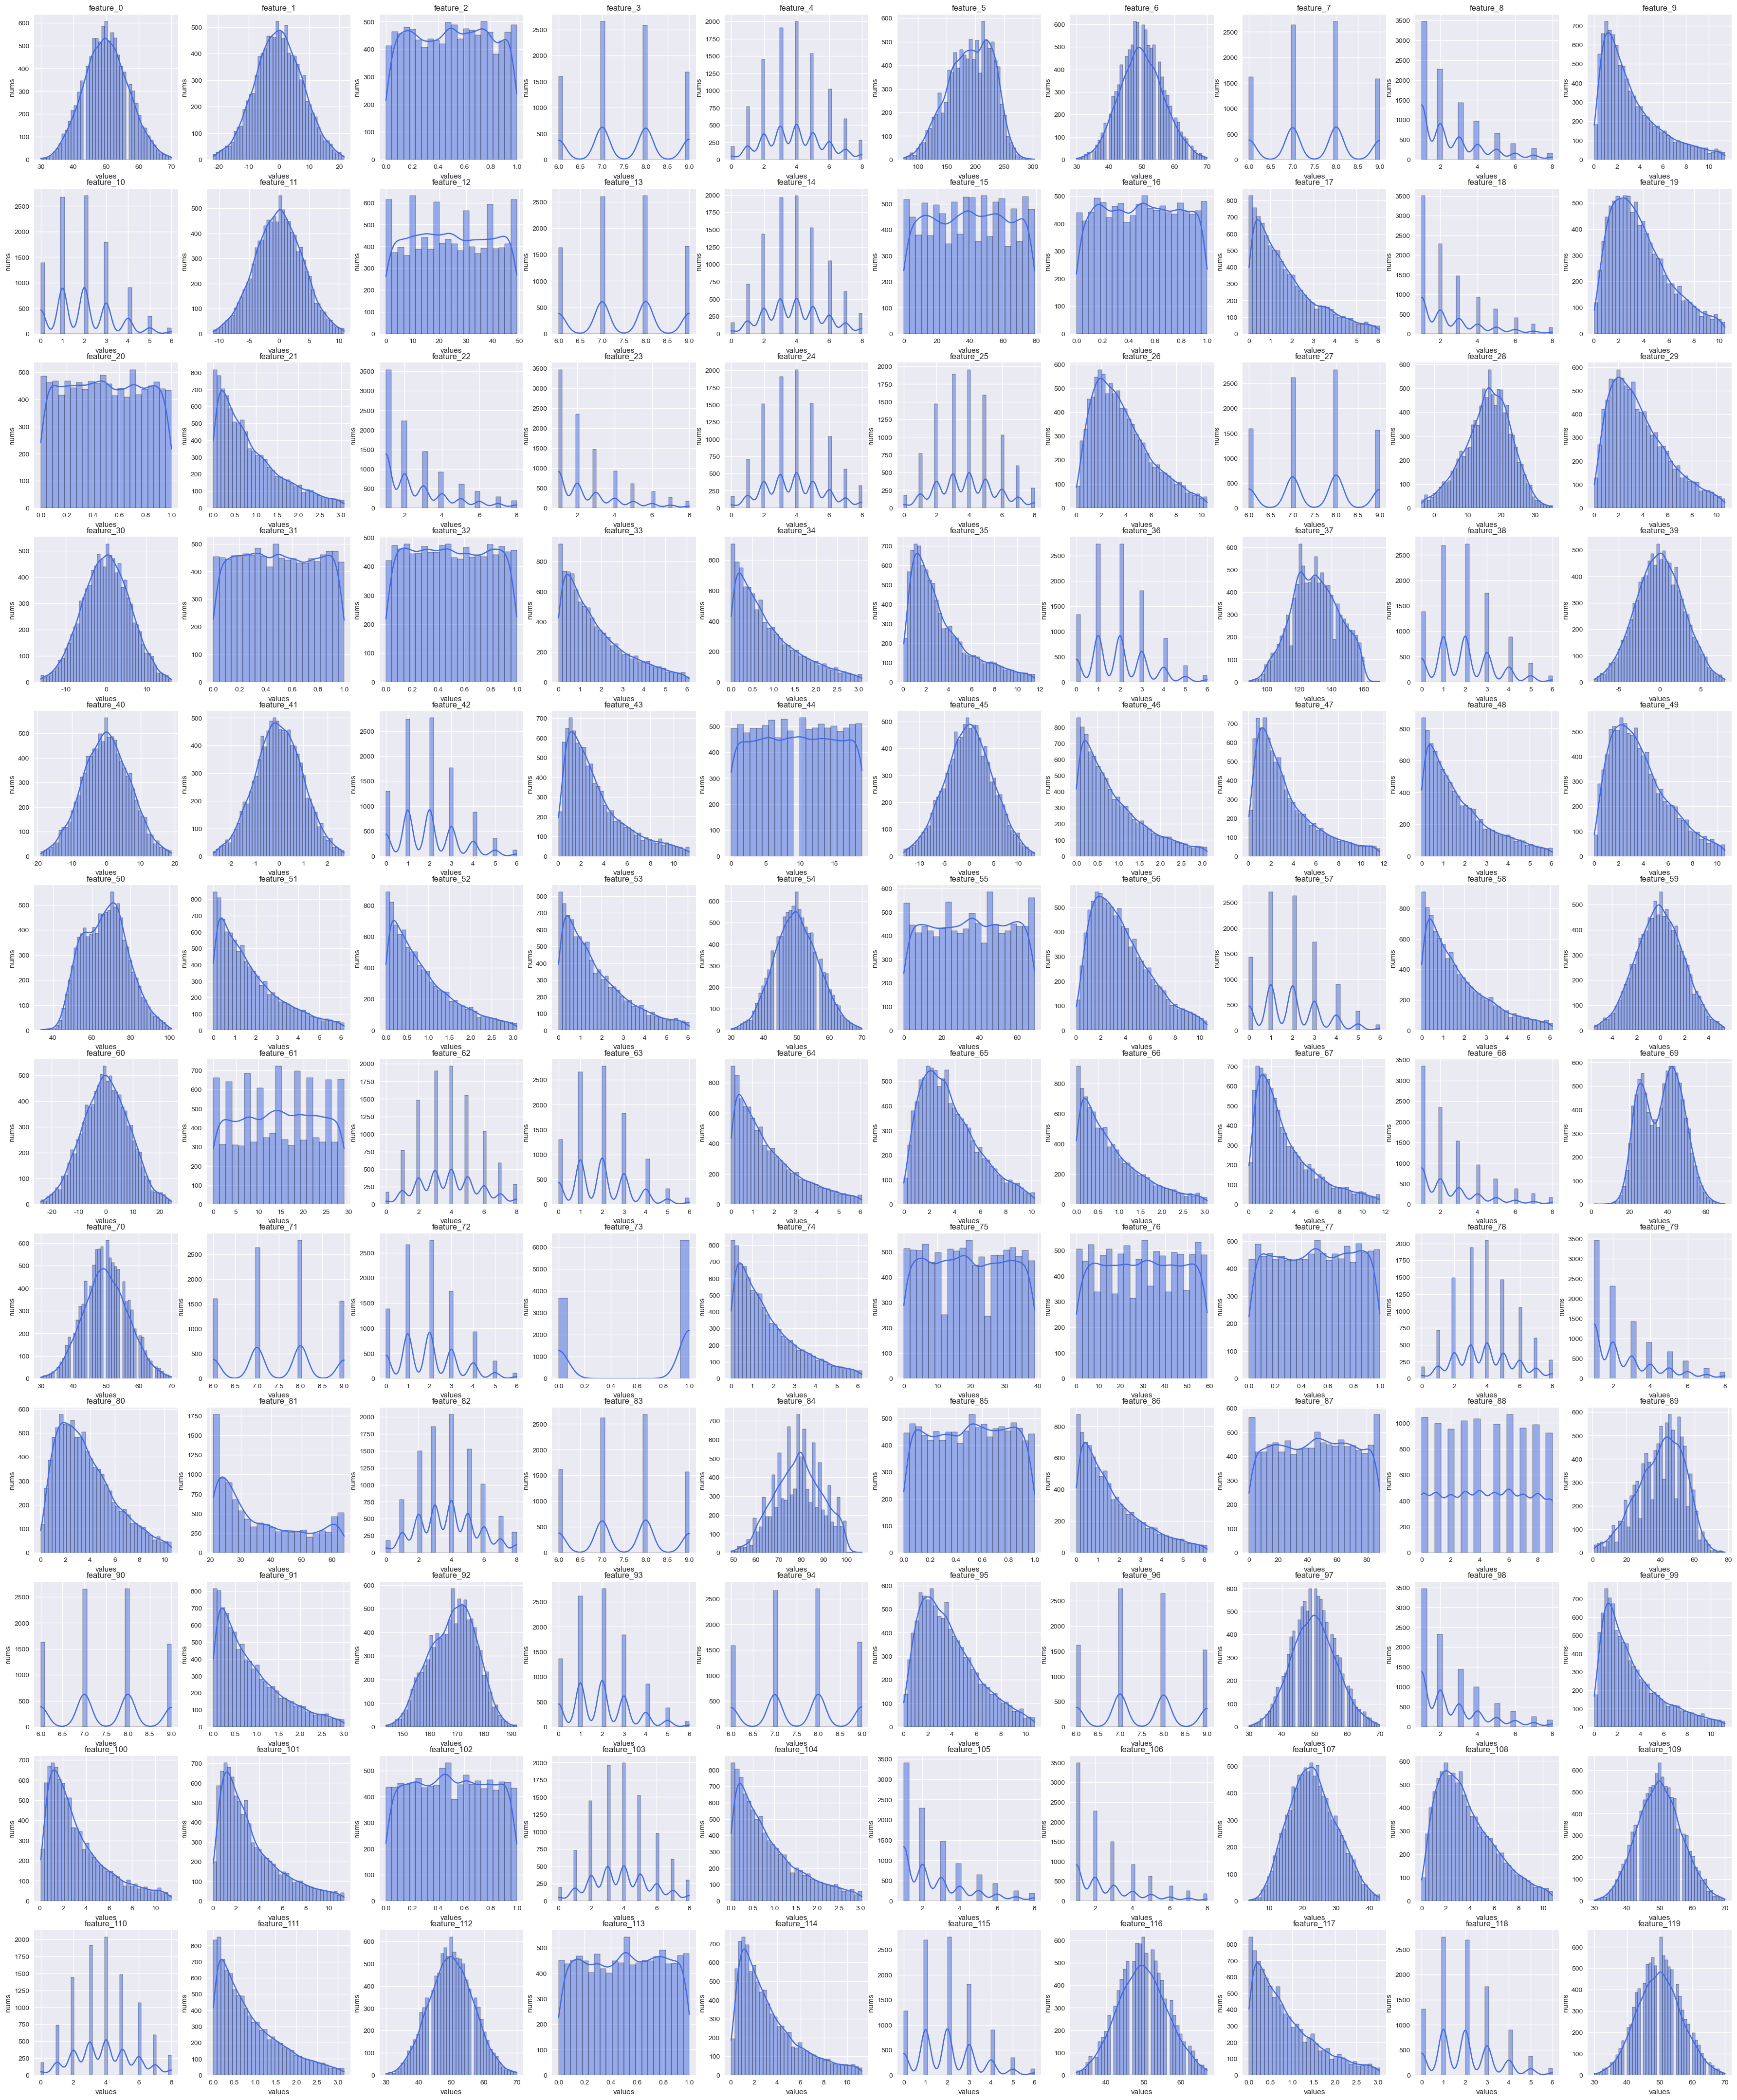

In [46]:
plt.style.use('seaborn')

features_set=list(df_train_feature)
fig, axes = plt.subplots(ncols=10, nrows=12,figsize=[45,55])
for i, ax, feature in zip(range(df_train_feature.shape[1]), axes.flat,features_set):
    ax.set_title(feature)
    ax.set_xlabel('values')
    ax.set_ylabel('nums')
    sns.histplot(df_train[feature].values,kde=True, ax=ax,color='royalblue')
plt.savefig("dataset.png")

### 2.2 缺失值

In [47]:
#丢弃缺失值
df_train_drop = df_train.dropna(axis=0, thresh=115)

In [48]:
df_train_drop.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8664 entries, 0 to 9999
Data columns (total 121 columns):
 #    Column       Non-Null Count  Dtype  
---   ------       --------------  -----  
 0    feature_0    8606 non-null   float64
 1    feature_1    8576 non-null   float64
 2    feature_2    8630 non-null   float64
 3    feature_3    7521 non-null   float64
 4    feature_4    8477 non-null   float64
 5    feature_5    8609 non-null   float64
 6    feature_6    8603 non-null   float64
 7    feature_7    7524 non-null   float64
 8    feature_8    8406 non-null   float64
 9    feature_9    8049 non-null   float64
 10   feature_10   8603 non-null   float64
 11   feature_11   8574 non-null   float64
 12   feature_12   8635 non-null   float64
 13   feature_13   7519 non-null   float64
 14   feature_14   8467 non-null   float64
 15   feature_15   8620 non-null   float64
 16   feature_16   8619 non-null   float64
 17   feature_17   8253 non-null   float64
 18   feature_18   8369 non-null

In [49]:
df_train_mean = df_train.fillna(df_train.mean())
df_train_median = df_train.fillna(df_train.median())

In [108]:
from sklearn.impute import KNNImputer
df_train_knn = pd.DataFrame(KNNImputer(n_neighbors=20).fit_transform(df_train), columns=df_train.columns)

In [51]:
#条件填充
df_train_con_median= df_train
for column in list(df_train_con_median.columns[df_train_con_median.isna().sum() > 0]):
    median = df_train_con_median.groupby(['label'])[column].median()
    df_train_con_median = df_train_con_median.set_index(['label'])
    df_train_con_median[column]=df_train_con_median[column].fillna(median)
    df_train_con_median = df_train_con_median.reset_index()
print(df_train_con_median.isna().sum())

label          0
feature_0      0
feature_1      0
feature_2      0
feature_3      0
feature_4      0
feature_5      0
feature_6      0
feature_7      0
feature_8      0
feature_9      0
feature_10     0
feature_11     0
feature_12     0
feature_13     0
feature_14     0
feature_15     0
feature_16     0
feature_17     0
feature_18     0
feature_19     0
feature_20     0
feature_21     0
feature_22     0
feature_23     0
feature_24     0
feature_25     0
feature_26     0
feature_27     0
feature_28     0
feature_29     0
feature_30     0
feature_31     0
feature_32     0
feature_33     0
feature_34     0
feature_35     0
feature_36     0
feature_37     0
feature_38     0
feature_39     0
feature_40     0
feature_41     0
feature_42     0
feature_43     0
feature_44     0
feature_45     0
feature_46     0
feature_47     0
feature_48     0
feature_49     0
feature_50     0
feature_51     0
feature_52     0
feature_53     0
feature_54     0
feature_55     0
feature_56     0
feature_57    

In [169]:
#丢弃后条填充
df_train_drop_median= df_train_drop.fillna(df_train_drop.median())

### 2.3独特率

In [174]:
df_train_median.nunique()

feature_0        41
feature_1      9835
feature_2      9913
feature_3         4
feature_4         9
feature_5       216
feature_6        41
feature_7         4
feature_8         8
feature_9      9156
feature_10        7
feature_11     9823
feature_12       50
feature_13        4
feature_14        9
feature_15       80
feature_16     9890
feature_17     9402
feature_18        8
feature_19     9590
feature_20     9894
feature_21     9436
feature_22        8
feature_23        8
feature_24        9
feature_25        9
feature_26     9558
feature_27        4
feature_28      392
feature_29     9598
feature_30     9823
feature_31     9916
feature_32     9906
feature_33     9488
feature_34     9428
feature_35     9138
feature_36        7
feature_37       79
feature_38        7
feature_39     9837
feature_40     9868
feature_41     9828
feature_42        7
feature_43     9168
feature_44       20
feature_45     9842
feature_46     9466
feature_47     9168
feature_48     9414
feature_49     9564


### 划分X y

In [109]:
X_mea = df_train_mean.iloc[:,:-1]
y_mea = df_train_mean.iloc[:,-1]
X_med = df_train_median.iloc[:,:-1]
y_med = df_train_median.iloc[:,-1]
X_knn = df_train_knn.iloc[:,:-1]
y_knn = df_train_knn.iloc[:,-1]

In [55]:
df_train_mean.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,feature_80,feature_81,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100,feature_101,feature_102,feature_103,feature_104,feature_105,feature_106,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119,label
0,48.0,9.804220,0.064283,6.000000,5.0,211.0,45.0,8.0,3.0,2.711200,4.0,3.715430,33.0,7.50611,2.0,5.0,0.333761,0.414486,2.0,2.114357,0.119574,0.771612,2.0,1.0,5.0,3.0,2.263406,8.0,10.4,6.997791,-5.065932,0.286405,0.893365,0.458214,0.105301,0.410960,1.0,134.0,1.0,-2.134477,11.910454,0.473144,2.0,3.594035,11.0,5.112548,0.860763,0.796434,2.271790,0.348518,73.6,1.337467,0.458976,1.903416,46.0,66.0,8.868346,0.0,0.397247,-2.739626,-6.044682,29.0,3.0,2.0,0.556974,1.438700,0.016331,1.886597,5.0,45.5,42.0,6.0,5.0,1.0,0.493134,24.0,58.0,0.284436,7.0,2.0,0.890394,36.0,6.000000,8.0,93.000000,0.670985,1.111593,25.0,0.0,45.0,8.0,0.837977,185.1,0.0,7.000000,0.822178,8.0,56.0,3.0,4.236259,3.249088,3.103457,0.002709,3.0,0.340554,1.0,3.0,16.8,1.902175,45.0,4.0,1.157242,44.0,0.027881,1.122944,0.000000,47.0,1.732584,2.0,52.0,0
1,45.0,-15.118262,0.590192,7.511093,2.0,141.0,48.0,7.0,1.0,3.276093,1.0,2.128829,40.0,6.00000,2.0,6.0,0.177085,0.435492,3.0,2.205235,0.227682,0.013337,2.0,1.0,1.0,4.0,0.580605,6.0,20.3,2.376867,-9.390402,0.827361,0.632463,4.084852,0.863154,1.149914,1.0,139.0,3.0,-3.300856,0.297134,-0.569790,3.0,3.271672,15.0,0.369064,0.282849,2.807077,2.709447,3.889995,57.6,0.128162,0.063727,1.949262,53.0,48.0,5.503106,3.0,0.987847,0.645836,-3.198560,10.0,3.0,1.0,1.050135,2.355833,0.731479,0.452308,1.0,24.7,45.0,8.0,3.0,0.0,4.756736,27.0,54.0,0.202113,2.0,4.0,5.108331,44.0,6.000000,6.0,83.000000,0.248115,3.050454,33.0,5.0,29.0,9.0,1.050274,162.4,2.0,7.000000,2.827500,9.0,58.0,3.0,3.183876,0.974267,4.811862,0.258902,2.0,0.234170,3.0,1.0,26.1,8.091975,43.0,4.0,0.583108,62.0,0.852767,4.685032,1.000000,38.0,0.601408,2.0,44.0,0
2,56.0,1.691250,0.173249,8.000000,1.0,251.0,47.0,6.0,1.0,1.082628,1.0,-0.804412,13.0,8.00000,2.0,54.0,0.093658,3.745314,2.0,2.150460,0.963845,0.685125,2.0,2.0,6.0,6.0,6.394303,8.0,27.4,0.403740,1.535146,0.423254,0.957615,1.082507,2.386798,3.279279,1.0,146.0,2.0,-1.649961,3.511144,0.441364,3.0,1.307822,2.0,-4.379225,2.727070,2.429055,1.293426,3.448918,79.4,0.373268,0.752788,0.511261,37.0,1.0,2.725935,2.0,2.320984,-1.039058,-0.018844,16.0,7.0,1.0,2.000951,0.588358,0.839223,2.852378,1.0,61.3,46.0,7.0,0.0,1.0,3.306496,5.0,47.0,0.572083,2.0,3.0,6.729624,31.0,3.839992,8.0,88.000000,0.933738,1.330558,48.0,1.0,47.0,8.0,0.724857,175.0,2.0,7.000000,4.564214,8.0,54.0,1.0,1.026638,2.508315,4.954331,0.484818,4.0,0.447751,1.0,1.0,18.7,3.591674,46.0,6.0,0.741096,62.0,0.907026,0.927391,2.000000,53.0,2.129846,1.0,46.0,0
3,50.0,5.867626,0.004743,8.000000,3.0,186.0,39.0,8.0,1.0,2.992557,0.0,-3.572742,32.0,7.00000,2.0,19.0,0.261339,4.200909,3.0,2.940532,0.927316,0.553592,3.0,3.0,4.0,6.0,4.719873,7.0,8.2,10.669434,9.052080,0.840979,0

In [56]:
X_c_med = df_train_con_median.iloc[:,1:]
y_c_med = df_train_con_median.iloc[:,0]

In [170]:
X_d_med = df_train_drop_median.iloc[:,:-1]
y_d_med = df_train_drop_median.iloc[:,-1]

In [58]:
# from sklearn.decomposition import PCA
# pca=PCA(n_components=60)
# X=pca.fit_transform(X)

### 2.5 标准化

In [110]:
a_X_mea=preprocessing.MinMaxScaler().fit_transform(X_mea)
df_X_mea = pd.DataFrame(a_X_mea, columns=X_mea.columns)
a_X_med=preprocessing.MinMaxScaler().fit_transform(X_med)
df_X_med = pd.DataFrame(a_X_med, columns=X_med.columns)
a_X_knn=preprocessing.MinMaxScaler().fit_transform(X_knn)
df_X_knn = pd.DataFrame(a_X_knn, columns=X_knn.columns)

In [60]:
a_X_c_med=preprocessing.MinMaxScaler().fit_transform(X_c_med)
df_X_c_med = pd.DataFrame(a_X_c_med, columns=X_c_med.columns)

In [172]:
a_X_d_med=preprocessing.MinMaxScaler().fit_transform(X_d_med)
df_X_d_med = pd.DataFrame(a_X_d_med, columns=X_d_med.columns)

### 2.6 相关性过滤

In [72]:
from sklearn.feature_selection import SelectKBest,chi2
model_mea = SelectKBest(score_func=chi2, k=19)
fit_mea = model_mea.fit(a_X_mea,y_mea)
df_scores = pd.DataFrame(fit_mea.scores_)
df_columns = pd.DataFrame(df_train_feature.columns)
list = model_mea.get_support(indices=True)
featureScores = pd.concat([df_columns,df_scores],axis=1)
featureScores.columns = ['Feature','Score']
print(featureScores.nlargest(30,'Score'))
# X_mea_sel = model_mea.transform(X_mea)
select_list_mea=featureScores.nlargest(19,'Score')['Feature'].tolist()
X_mea_sel = df_X_mea[select_list_mea]

         Feature     Score
73    feature_73  3.622972
15    feature_15  2.852665
20    feature_20  1.356439
88    feature_88  1.273343
12    feature_12  1.267401
81    feature_81  1.252109
2      feature_2  1.247899
100  feature_100  1.222590
29    feature_29  1.203006
33    feature_33  1.158411
22    feature_22  1.095485
79    feature_79  1.035733
7      feature_7  0.976037
49    feature_49  0.921802
17    feature_17  0.892173
82    feature_82  0.890089
110  feature_110  0.871152
48    feature_48  0.842143
56    feature_56  0.830573
76    feature_76  0.817303
31    feature_31  0.810677
75    feature_75  0.789791
8      feature_8  0.759477
65    feature_65  0.730113
64    feature_64  0.729562
57    feature_57  0.723384
106  feature_106  0.710419
117  feature_117  0.695261
61    feature_61  0.692749
36    feature_36  0.667380


In [192]:
model_med = SelectKBest(score_func=chi2, k=19)
fit_med = model_med.fit(df_X_med,y_med)
df_scores = pd.DataFrame(fit_med.scores_)
df_columns = pd.DataFrame(df_train_feature.columns)
# model.get_support(indices=True)
featureScores = pd.concat([df_columns,df_scores],axis=1)
featureScores.columns = ['Feature','Score']
print(featureScores.nlargest(30,'Score'))
# X_med_sel = model_med.transform(X_med)
select_list_med=featureScores.nlargest(20,'Score')['Feature'].tolist()
X_med_sel = df_X_med[select_list_med]

         Feature     Score
73    feature_73  3.811723
15    feature_15  2.850349
20    feature_20  1.356109
33    feature_33  1.316590
88    feature_88  1.274713
12    feature_12  1.267853
81    feature_81  1.248780
2      feature_2  1.248270
100  feature_100  1.188736
29    feature_29  1.154131
22    feature_22  1.083303
79    feature_79  1.054844
7      feature_7  1.036563
49    feature_49  0.927287
17    feature_17  0.905437
82    feature_82  0.870853
110  feature_110  0.867254
56    feature_56  0.827715
76    feature_76  0.818013
31    feature_31  0.810138
106  feature_106  0.805367
75    feature_75  0.787936
65    feature_65  0.744519
48    feature_48  0.741592
57    feature_57  0.720314
117  feature_117  0.719669
8      feature_8  0.700337
61    feature_61  0.693998
23    feature_23  0.692807
64    feature_64  0.683455


In [193]:
X_med_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   feature_73   10000 non-null  float64
 1   feature_15   10000 non-null  float64
 2   feature_20   10000 non-null  float64
 3   feature_33   10000 non-null  float64
 4   feature_88   10000 non-null  float64
 5   feature_12   10000 non-null  float64
 6   feature_81   10000 non-null  float64
 7   feature_2    10000 non-null  float64
 8   feature_100  10000 non-null  float64
 9   feature_29   10000 non-null  float64
 10  feature_22   10000 non-null  float64
 11  feature_79   10000 non-null  float64
 12  feature_7    10000 non-null  float64
 13  feature_49   10000 non-null  float64
 14  feature_17   10000 non-null  float64
 15  feature_82   10000 non-null  float64
 16  feature_110  10000 non-null  float64
 17  feature_56   10000 non-null  float64
 18  feature_76   10000 non-null  float64
 19  featu

In [111]:
model_knn = SelectKBest(score_func=chi2, k=19)
fit_knn = model_knn.fit(df_X_knn,y_knn)
df_scores = pd.DataFrame(fit_knn.scores_)
df_columns = pd.DataFrame(df_train_feature.columns)
# model.get_support(indices=True)
featureScores = pd.concat([df_columns,df_scores],axis=1)
featureScores.columns = ['Feature','Score']
print(featureScores.nlargest(30,'Score'))
# X_knn_sel = model_knn.transform(X_knn)
select_list_knn=featureScores.nlargest(19,'Score')['Feature'].tolist()
X_knn_sel = df_X_knn[select_list_knn]

         Feature     Score
73    feature_73  3.775705
15    feature_15  2.848397
100  feature_100  1.348656
20    feature_20  1.344275
88    feature_88  1.265233
12    feature_12  1.257623
2      feature_2  1.255799
33    feature_33  1.225385
81    feature_81  1.206601
29    feature_29  1.189371
22    feature_22  1.014927
79    feature_79  0.954383
17    feature_17  0.944100
49    feature_49  0.931933
82    feature_82  0.886337
7      feature_7  0.875964
110  feature_110  0.859365
48    feature_48  0.841112
56    feature_56  0.830925
76    feature_76  0.826299
31    feature_31  0.804147
75    feature_75  0.803997
117  feature_117  0.744713
64    feature_64  0.732106
65    feature_65  0.726852
8      feature_8  0.714636
57    feature_57  0.713896
106  feature_106  0.706136
61    feature_61  0.691910
36    feature_36  0.675046


In [ ]:
model_c_med = SelectKBest(score_func=chi2, k=19)
fit_c_med = model_c_med.fit(df_X_c_med,y_c_med)
df_scores = pd.DataFrame(fit_c_med.scores_)
df_columns = pd.DataFrame(df_train_feature.columns)
# model.get_support(indices=True)
featureScores = pd.concat([df_columns,df_scores],axis=1)
featureScores.columns = ['Feature','Score']
print(featureScores.nlargest(30,'Score'))
# X_c_med_sel = model_c_med.transform(X_c_med)
select_list_c_med=featureScores.nlargest(19,'Score')['Feature'].tolist()
X_c_med_sel = df_X_c_med[select_list_c_med]

         Feature      Score
7      feature_7  18.696107
83    feature_83  14.502335
27    feature_27  13.176440
3      feature_3  12.798772
71    feature_71  12.347897
90    feature_90  10.760328
13    feature_13  10.631434
96    feature_96   9.748034
73    feature_73   3.811723
15    feature_15   2.888730
33    feature_33   1.475745
100  feature_100   1.424703
20    feature_20   1.388104
88    feature_88   1.327696
12    feature_12   1.275835
81    feature_81   1.267609
2      feature_2   1.256671
29    feature_29   1.238490
22    feature_22   1.083303
79    feature_79   1.054844
49    feature_49   0.988493
17    feature_17   0.969246
56    feature_56   0.886553
48    feature_48   0.873254
82    feature_82   0.870853
110  feature_110   0.867254
31    feature_31   0.828837
76    feature_76   0.823069
75    feature_75   0.811414
106  feature_106   0.805367


In [173]:
model_d_c_med = SelectKBest(score_func=chi2, k=19)
fit_d_c_med = model_d_c_med.fit(df_X_d_med,y_d_med)
df_scores = pd.DataFrame(fit_d_c_med.scores_)
df_columns = pd.DataFrame(df_train_feature.columns)
# model.get_support(indices=True)
featureScores = pd.concat([df_columns,df_scores],axis=1)
featureScores.columns = ['Feature','Score']
print(featureScores.nlargest(30,'Score'))
# X_d_c_med_sel = model_d_c_med.transform(X_d_c_med)
select_list_d_c_med=featureScores.nlargest(19,'Score')['Feature'].tolist()
X_d_c_med_sel = df_X_d_med[select_list_d_c_med]

         Feature     Score
73    feature_73  3.329589
15    feature_15  2.396067
33    feature_33  2.385988
88    feature_88  1.772811
20    feature_20  1.680228
81    feature_81  1.305162
12    feature_12  1.288869
76    feature_76  1.286406
2      feature_2  1.089799
100  feature_100  1.086633
77    feature_77  0.984039
44    feature_44  0.951872
64    feature_64  0.917530
29    feature_29  0.911210
65    feature_65  0.892829
48    feature_48  0.875578
46    feature_46  0.861797
24    feature_24  0.845170
7      feature_7  0.838731
49    feature_49  0.828730
117  feature_117  0.827215
17    feature_17  0.821903
87    feature_87  0.820401
90    feature_90  0.790890
56    feature_56  0.781771
66    feature_66  0.776693
36    feature_36  0.730731
42    feature_42  0.723255
16    feature_16  0.713260
82    feature_82  0.710798


In [187]:
from sklearn.feature_selection import mutual_info_classif as MIC
X_select_MIC = SelectKBest(score_func=MIC, k=10)
fit = X_select_MIC.fit(df_X_med,y_med)
dfscores_MIC = pd.DataFrame(fit.scores_)
dfcolumns_MIC = pd.DataFrame(df_train_feature.columns)
#concat two dataframes for better visualization
featureScores_MIC = pd.concat([dfcolumns_MIC,dfscores_MIC],axis=1)
featureScores_MIC.columns = ['Feature','Score']  #naming the dataframe columns
print(featureScores_MIC.nlargest(30,'Score'))  #print 30 best features
select_list_med_MIC=featureScores_MIC.nlargest(30,'Score')['Feature'].tolist()

         Feature     Score
44    feature_44  0.015891
118  feature_118  0.014656
109  feature_109  0.014094
34    feature_34  0.012986
77    feature_77  0.012836
75    feature_75  0.012414
49    feature_49  0.012238
63    feature_63  0.011656
82    feature_82  0.010766
106  feature_106  0.010415
52    feature_52  0.010222
9      feature_9  0.009698
10    feature_10  0.009609
89    feature_89  0.009287
97    feature_97  0.008946
67    feature_67  0.008604
33    feature_33  0.008591
24    feature_24  0.007246
99    feature_99  0.007187
92    feature_92  0.007136
42    feature_42  0.007051
62    feature_62  0.006797
35    feature_35  0.006659
100  feature_100  0.006497
7      feature_7  0.006010
43    feature_43  0.005769
69    feature_69  0.005534
112  feature_112  0.005181
50    feature_50  0.005124
54    feature_54  0.005103


## 3. 数据集划分

In [436]:
# 数据集划分
X_train, X_test, y_train, y_test = train_test_split(X_med_sel, y_med , test_size=0.2, stratify=y_med)

In [336]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 2402 to 2913
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   feature_73   8000 non-null   float64
 1   feature_15   8000 non-null   float64
 2   feature_20   8000 non-null   float64
 3   feature_33   8000 non-null   float64
 4   feature_88   8000 non-null   float64
 5   feature_12   8000 non-null   float64
 6   feature_81   8000 non-null   float64
 7   feature_2    8000 non-null   float64
 8   feature_100  8000 non-null   float64
 9   feature_29   8000 non-null   float64
 10  feature_22   8000 non-null   float64
 11  feature_79   8000 non-null   float64
 12  feature_7    8000 non-null   float64
 13  feature_49   8000 non-null   float64
 14  feature_17   8000 non-null   float64
 15  feature_82   8000 non-null   float64
 16  feature_110  8000 non-null   float64
 17  feature_56   8000 non-null   float64
 18  feature_76   8000 non-null   float64
 19  fea

In [79]:
X_med_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   feature_73   10000 non-null  float64
 1   feature_15   10000 non-null  float64
 2   feature_20   10000 non-null  float64
 3   feature_33   10000 non-null  float64
 4   feature_88   10000 non-null  float64
 5   feature_12   10000 non-null  float64
 6   feature_81   10000 non-null  float64
 7   feature_2    10000 non-null  float64
 8   feature_100  10000 non-null  float64
 9   feature_29   10000 non-null  float64
 10  feature_22   10000 non-null  float64
 11  feature_79   10000 non-null  float64
 12  feature_7    10000 non-null  float64
 13  feature_49   10000 non-null  float64
 14  feature_17   10000 non-null  float64
 15  feature_82   10000 non-null  float64
 16  feature_110  10000 non-null  float64
 17  feature_56   10000 non-null  float64
 18  feature_76   10000 non-null  float64
dtypes: fl

## 4.模型验证

In [80]:
class MyLogisticRegression:
    def __init__(self, penalty="l2", gamma=0, fit_intercept=True):
        err_msg = "penalty must be 'l1' or 'l2', but got: {}".format(penalty)
        assert penalty in ["l2", "l1"], err_msg
        self.penalty = penalty
        self.gamma = gamma
        self.fit_intercept = fit_intercept

    def sigmoid(self, x):
        """The logistic sigmoid function"""
        y_hat = 1 / (1 + np.exp(-x))
        return y_hat

    def fit(self, X, y, lr=0.01, tol=1e-7, max_iter=1e7):
        """
        Fit the regression coefficients via gradient descent or other methods
        """
        # m : number of data points in the dataset
        # n : number of input features in the dataset
        self.m, self.n = X.shape
        self.X = X
        self.y = y
        self.lr = lr
        self.max_iter = max_iter

        # initiating
        self.w = np.zeros(self.n)
        self.b = 0
        cost_list = []
        delta = 1
        cost = 0
        i = 0
        dw = 0
        db = 0

        # implement gradient descent for optimization
        while i < self.max_iter and delta > tol:
            # y_hat formula(sigmoid function)
            z = np.dot(self.X, self.w) + self.b
            y_hat = self.sigmoid(z)

            # l1
            if self.penalty == 'l1':
                cost = -(1 / self.m) * (np.sum(self.y * np.log(y_hat) + (1 - self.y) * np.log(1 - y_hat))+ self.gamma * np.sum(abs(self.w)))
                # derivatives
                dw = (1 / self.m) * (
                            (np.dot(self.X.T, (y_hat - self.y)) + self.w) + self.gamma * np.sum(np.sign(self.w)))
                # if false, do not update db to keep b=0
                if self.fit_intercept:
                    db = (1 / self.m) * np.sum(y_hat - self.y)
            # l2
            if self.penalty == 'l2':
                cost = -(1 / self.m) * (np.sum(self.y * np.log(y_hat) + (1 - self.y) * np.log(1 - y_hat))+ self.gamma / 2 * np.dot(self.w.T, self.w))
                # derivatives
                dw = (1 / self.m) * (np.dot(self.X.T, (y_hat - self.y)) + self.gamma * self.w)
                # if false, do not update db to keep b=0
                if self.fit_intercept:
                    db = (1 / self.m) * np.sum(y_hat - self.y)

            # update the weights &bias
            self.w = self.w - self.lr * dw
            self.b = self.b - self.lr * db
            # if i % (max_iter / 10) == 0:
            #     print("cost after ", i, " iterations: ", cost)

            cost_list.append(cost)

            # judge tol
            if i >= 1:
                delta = abs(cost_list[i] - cost_list[i - 1])

            i += 1

        return i, cost_list

    def predict(self, X):
        """ion probabilities on a new
        collection of data points.
        Use the trained model to generate predict
        """

        z = np.dot(X, self.w) + self.b
        y_pred = self.sigmoid(z)
        y_pred = np.where(y_pred > 0.5, 1, 0)
        return y_pred

In [343]:
#OvO
y_test_pred_list=[]
train_data = pd.concat([pd.DataFrame(X_train),pd.DataFrame(y_train)],axis=1)
for i in range(0,3):
    for j in range(i+1,4):
        print(i,j)
        df_train_i = train_data.loc[train_data['label'] == i]
        df_train_j = train_data.loc[train_data['label'] == j]
        df_train_ij = pd.concat([df_train_i,df_train_j],axis=0)
        df_train_ij = df_train_ij.replace({"label":{i:0,j:1}})
        print(df_train_ij['label'].value_counts())
        X_ij = df_train_ij.iloc[:,:-1]
        y_ij = df_train_ij.iloc[:,-1]
        print(X_ij.info())
        print(y_ij.info())

        lc_ij=MyLogisticRegression(penalty="l1", gamma=10, fit_intercept=True)
        iters, cost_list = lc_ij.fit(X_train,y_train,lr=1e-3,tol=1e-1,max_iter=2000)
        lc_ij.fit(X_ij,y_ij)
        y_pred_ij = lc_ij.predict(X_ij)
        print(accuracy_score(y_ij, y_pred_ij))
        y_test_pred_ij = lc_ij.predict(X_test)
        print(y_test_pred_ij)
        y_test_pred_list.append(y_test_pred_ij)

0 1
1    2035
0    2002
Name: label, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4037 entries, 7536 to 5621
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   feature_73   4037 non-null   float64
 1   feature_15   4037 non-null   float64
 2   feature_20   4037 non-null   float64
 3   feature_33   4037 non-null   float64
 4   feature_88   4037 non-null   float64
 5   feature_12   4037 non-null   float64
 6   feature_81   4037 non-null   float64
 7   feature_2    4037 non-null   float64
 8   feature_100  4037 non-null   float64
 9   feature_29   4037 non-null   float64
 10  feature_22   4037 non-null   float64
 11  feature_79   4037 non-null   float64
 12  feature_7    4037 non-null   float64
 13  feature_49   4037 non-null   float64
 14  feature_17   4037 non-null   float64
 15  feature_82   4037 non-null   float64
 16  feature_110  4037 non-null   float64
 17  feature_56   4037 non-null   float64


In [121]:
# df = pd.DataFrame(y_test_pred_list)
# df = df.melt(value_vars=df.columns.tolist()[1:])

In [344]:
for i,x in enumerate(y_test_pred_list[1]):
    if x==1:
        y_test_pred_list[1][i]=2
for i,x in enumerate(y_test_pred_list[2]):
    if x==1:
        y_test_pred_list[2][i]=3
for i,x in enumerate(y_test_pred_list[3]):
    if x==0:
        y_test_pred_list[3][i]=1
    elif x==1:
        y_test_pred_list[3][i]=2
for i,x in enumerate(y_test_pred_list[4]):
    if x==0:
        y_test_pred_list[4][i]=1
    elif x==1:
        y_test_pred_list[4][i]=3
for i,x in enumerate(y_test_pred_list[5]):
    if x==0:
        y_test_pred_list[5][i]=2
    elif x==1:
        y_test_pred_list[5][i]=3

In [345]:
y_test_pred_list

[array([1, 0, 0, ..., 0, 0, 1]),
 array([0, 0, 0, ..., 0, 0, 2]),
 array([0, 0, 0, ..., 0, 3, 3]),
 array([1, 2, 1, ..., 1, 2, 2]),
 array([1, 1, 3, ..., 1, 3, 3]),
 array([2, 2, 3, ..., 3, 3, 3])]

In [346]:
sum_test = [0,0,0,0]
y_test_pred=[]
for j in range(0,len(y_test)):
    max = 0
    label = 0
    for i in range(0,6):
        pred = y_test_pred_list[i][j]
        sum_test[pred]+=0
        for t,x in enumerate(sum_test):
            if x>=max:
                max = x
                label = t
    y_test_pred.append(label)
print(accuracy_score(y_test, y_test_pred))

0.251


In [351]:
#OvO
from sklearn.linear_model import  LogisticRegression
y_test_pred_list=[]
train_data = pd.concat([pd.DataFrame(X_train),pd.DataFrame(y_train)],axis=1)
for i in range(0,3):
    for j in range(i+1,4):
        print(i,j)
        df_train_i = train_data.loc[train_data['label'] == i]
        df_train_j = train_data.loc[train_data['label'] == j]
        df_train_ij = pd.concat([df_train_i,df_train_j],axis=0)
        print(df_train_ij['label'].value_counts())
        X_ij = df_train_ij.iloc[:,:-1]
        y_ij = df_train_ij.iloc[:,-1]
        print(X_ij.info())
        print(y_ij.info())

        lc_ij = LogisticRegression(max_iter=5000,tol=1e-6,fit_intercept=False,C=2)
        lc_ij.fit(X_ij,y_ij)
        y_pred_ij = lc_ij.predict(X_ij)
        print(accuracy_score(y_ij, y_pred_ij))
        y_test_pred_ij = lc_ij.predict(X_test)
        print(y_test_pred_ij)
        y_test_pred_list.append(y_test_pred_ij)

0 1
1    2035
0    2002
Name: label, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4037 entries, 7536 to 5621
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   feature_73   4037 non-null   float64
 1   feature_15   4037 non-null   float64
 2   feature_20   4037 non-null   float64
 3   feature_33   4037 non-null   float64
 4   feature_88   4037 non-null   float64
 5   feature_12   4037 non-null   float64
 6   feature_81   4037 non-null   float64
 7   feature_2    4037 non-null   float64
 8   feature_100  4037 non-null   float64
 9   feature_29   4037 non-null   float64
 10  feature_22   4037 non-null   float64
 11  feature_79   4037 non-null   float64
 12  feature_7    4037 non-null   float64
 13  feature_49   4037 non-null   float64
 14  feature_17   4037 non-null   float64
 15  feature_82   4037 non-null   float64
 16  feature_110  4037 non-null   float64
 17  feature_56   4037 non-null   float64


In [358]:
lc_ij = LogisticRegression(max_iter=10,tol=1e-3,fit_intercept=False,C=1)
lc_ij.fit(X_train,y_train)
y_test_pred = lc_ij.predict(X_test)
print(accuracy_score(y_test, y_test_pred))

0.2735


D:\Anaconda3\envs\ml\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [349]:
y_test_pred_list

[array([1, 0, 0, ..., 0, 0, 1], dtype=int64),
 array([0, 0, 0, ..., 0, 2, 2], dtype=int64),
 array([0, 0, 3, ..., 0, 3, 3], dtype=int64),
 array([1, 2, 1, ..., 1, 2, 2], dtype=int64),
 array([1, 1, 3, ..., 1, 3, 3], dtype=int64),
 array([2, 2, 3, ..., 3, 2, 3], dtype=int64)]

In [352]:
sum_test = [0,0,0,0]
y_test_pred=[]
for j in range(0,len(y_test)):
    max = 0
    label = 0
    for i in range(0,6):
        pred = y_test_pred_list[i][j]
        sum_test[pred]+=0
        for t,x in enumerate(sum_test):
            if x>=max:
                max = x
                label = t
    y_test_pred.append(label)
print(accuracy_score(y_test, y_test_pred))

0.251


In [304]:
# 决策树
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy',max_depth=None,min_samples_split=5,min_samples_leaf=5,max_leaf_nodes=None,splitter='best')
# dtc.fit(X_train, y_train)
# print(dtc.score(X_train,y_train))
# print(dtc.score(X_test,y_test))
# y_train_pred = dtc.predict(X_train)
# y_test_pred = dtc.predict(X_test)
# print(accuracy_score(y_train, y_train_pred))
# print(accuracy_score(y_test, y_test_pred))
scores = cross_validate(dtc,X_med_sel, y_med, cv=5,scoring=('accuracy'),return_train_score=True)
print(scores)
print(np.mean(scores['train_score']))
print(np.mean(scores['test_score']))

{'fit_time': array([0.03085589, 0.02993703, 0.02792883, 0.02754498, 0.02792025]), 'score_time': array([0.00302839, 0.00199485, 0.00301695, 0.00199413, 0.00199723]), 'test_score': array([0.2575, 0.2405, 0.2525, 0.2445, 0.261 ]), 'train_score': array([0.595875, 0.600375, 0.59725 , 0.589625, 0.59425 ])}
0.5954749999999999
0.2512


In [274]:
# 神经网络
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(activation = 'relu',solver = 'adam',alpha=1e-5,hidden_layer_sizes=(16,16,),batch_size=100,max_iter=3000,tol=1e-3)
# mlp.fit(X_train, y_train)
# y_train_pred = mlp.predict(X_train)
# y_test_pred = mlp.predict(X_test)
scores = cross_validate(mlp,X_med_sel, y_med, cv=5,scoring=('accuracy'),return_train_score=True)
print(scores)
print(np.mean(scores['train_score']))
print(np.mean(scores['test_score']))

# print(accuracy_score(y_train, y_train_pred))
# print(accuracy_score(y_test, y_test_pred))

{'fit_time': array([0.7039187 , 1.22655606, 1.11417341, 0.6649785 , 0.75160098]), 'score_time': array([0.03390932, 0.00199485, 0.00300789, 0.00199461, 0.00199413]), 'test_score': array([0.275 , 0.25  , 0.2675, 0.2525, 0.2595]), 'train_score': array([0.289   , 0.299625, 0.286875, 0.28775 , 0.30525 ])}
0.29369999999999996
0.2609


In [388]:
# 支持向量机
from sklearn import svm
svmc = svm.SVC(decision_function_shape='ovo',kernel='rbf',C=2,gamma='auto',tol=0.01,max_iter=3000)
# svmc.fit(X_train,y_train)
# y_train_pred = svmc.predict(X_train)
# y_test_pred = svmc.predict(X_test)
# print(accuracy_score(y_train, y_train_pred))
# print(accuracy_score(y_test, y_test_pred))

scores = cross_validate(svmc,X_med_sel, y_med, cv=5,scoring=('accuracy'),return_train_score=True)
print(scores)
print(np.mean(scores['fit_time']))
print(np.mean(scores['train_score']))
print(np.mean(scores['test_score']))

{'fit_time': array([6.53939891, 5.29682612, 5.48326349, 6.1567502 , 5.42933464]), 'score_time': array([2.02876329, 2.24588871, 2.05692434, 2.01766706, 1.99839497]), 'test_score': array([0.278 , 0.2535, 0.2685, 0.2745, 0.256 ]), 'train_score': array([0.29925 , 0.297875, 0.296125, 0.294625, 0.301375])}
5.781114673614502
0.29785
0.2661


In [447]:
# you can do anything necessary about the model
class mySVM:
    def __init__(self, dim, lr, max_iter, C):
        """
        You can add some other parameters, which I think is not necessary
        """
        self.dim = dim
        self.lr = lr
        self.max_iter = max_iter
        self.C = C

    def fit(self, X, y):
        """
        Fit the coefficients via your methods
        """

        # initiate the weight value and bias value
        self.w = np.zeros(self.dim)
        self.b = 0
        num = X.shape[0]

        # implement Gradient Descent for optimization
        for seq in range(self.max_iter):
            # gradients

            # for index,x_i in enumerate(self.X):
            #     if y[index] * (np.dot(x_i,self.w)-self.b) >= 1:
            #         dw = self.lambda_para*self.w
            #         db = 0
            #     else:
            #         dw = self.lambda_para*self.w - np.dot(x_i, [index])
            #         db = [index]
            condition = np.multiply(y,np.dot(X,self.w)+self.b)

            dw = self.w - self.C*np.dot(X[np.where(condition<1)].T,y[np.where(condition<1)])/num
            db = -self.C * np.sum(y[np.where(condition<1)])/num

            self.w = self.w - self.lr * dw
            self.b = self.b - self.lr * db

    def predict(self, X):
        """
        Use the trained model to generate prediction probabilities on a new
        collection of data points.
        """

        output = np.dot(X,self.w) + self.b
        predicted_label = np.sign(output)

        return predicted_label


In [467]:
#OvO
y_test_pred_list=[]
train_data = pd.concat([pd.DataFrame(X_train),pd.DataFrame(y_train)],axis=1)
for i in range(0,3):
    for j in range(i+1,4):
        print(i,j)
        df_train_i = train_data.loc[train_data['label'] == i]
        df_train_j = train_data.loc[train_data['label'] == j]
        df_train_ij = pd.concat([df_train_i,df_train_j],axis=0)
        df_train_ij = df_train_ij.replace({"label":{i:-1,j:1}})
        print(df_train_ij['label'].value_counts())
        X_ij = df_train_ij.iloc[:,:-1]
        y_ij = df_train_ij.iloc[:,-1]
        print(X_ij.info())
        print(y_ij.info())

        svmc=mySVM(dim = 20, lr=1e-5, max_iter=3000, C = 5)
        svmc.fit(np.array(X_ij),np.array(y_ij))
        y_pred_ij = svmc.predict(X_ij)
        print(y_pred_ij)
        print(accuracy_score(y_ij, y_pred_ij))
        y_test_pred_ij = svmc.predict(X_test)
        print(y_test_pred_ij)
        y_test_pred_list.append(y_test_pred_ij)

0 1
-1    2018
 1    2017
Name: label, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4035 entries, 5601 to 5705
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   feature_73   4035 non-null   float64
 1   feature_15   4035 non-null   float64
 2   feature_20   4035 non-null   float64
 3   feature_33   4035 non-null   float64
 4   feature_88   4035 non-null   float64
 5   feature_12   4035 non-null   float64
 6   feature_81   4035 non-null   float64
 7   feature_2    4035 non-null   float64
 8   feature_100  4035 non-null   float64
 9   feature_29   4035 non-null   float64
 10  feature_22   4035 non-null   float64
 11  feature_79   4035 non-null   float64
 12  feature_7    4035 non-null   float64
 13  feature_49   4035 non-null   float64
 14  feature_17   4035 non-null   float64
 15  feature_82   4035 non-null   float64
 16  feature_110  4035 non-null   float64
 17  feature_56   4035 non-null   float6

In [468]:
y_test_pred_list

[array([-1.,  1., -1., ..., -1., -1., -1.]),
 array([-1., -1., -1., ..., -1., -1., -1.]),
 array([-1., -1., -1., ..., -1., -1., -1.]),
 array([-1., -1., -1., ..., -1., -1., -1.]),
 array([-1., -1., -1., ..., -1., -1., -1.]),
 array([-1., -1., -1., ..., -1., -1., -1.])]

In [469]:
for i,x in enumerate(y_test_pred_list[0]):
    if x==-1:
        y_test_pred_list[0][i]=0
for i,x in enumerate(y_test_pred_list[1]):
    if x==-1:
        y_test_pred_list[1][i]=0
    elif x==1:
        y_test_pred_list[1][i]=2
for i,x in enumerate(y_test_pred_list[2]):
    if x==-1:
        y_test_pred_list[2][i]=0
    elif x==1:
        y_test_pred_list[2][i]=3
for i,x in enumerate(y_test_pred_list[3]):
    if x==-1:
        y_test_pred_list[3][i]=1
    elif x==1:
        y_test_pred_list[3][i]=2
for i,x in enumerate(y_test_pred_list[4]):
    if x==-1:
        y_test_pred_list[4][i]=1
    elif x==1:
        y_test_pred_list[4][i]=3
for i,x in enumerate(y_test_pred_list[5]):
    if x==-1:
        y_test_pred_list[5][i]=2
    elif x==1:
        y_test_pred_list[5][i]=3

In [470]:
y_test_pred_list

[array([0., 1., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([1., 1., 1., ..., 1., 1., 1.]),
 array([1., 1., 1., ..., 1., 1., 1.]),
 array([2., 2., 2., ..., 2., 2., 2.])]

In [471]:
sum_test = [0,0,0,0]
y_test_pred=[]
for j in range(0,len(y_test)):
    max = 0
    label = 0
    for i in range(0,6):
        pred = y_test_pred_list[i][j]
        sum_test[int(pred)]+=0
        for t,x in enumerate(sum_test):
            if x>=max:
                max = x
                label = t
    y_test_pred.append(label)
print(accuracy_score(y_test, y_test_pred))

0.2455


In [416]:
# xgboost
import xgboost as xgb
xgbc = xgb.XGBClassifier(booster='gbtree',objective='multi:softmax',num_class=4,gamma=5,max_depth=5,eta=0.1)

scores = cross_validate(xgbc,df_X_mea, y_mea, cv=5,scoring=('accuracy'),return_train_score=True)
print(scores)
print(np.mean(scores['fit_time']))
print(np.mean(scores['train_score']))
print(np.mean(scores['test_score']))


KeyboardInterrupt



In [421]:
# xgboost
xgbc = xgb.XGBClassifier(booster='gblinear',objective='multi:softmax',num_class=4,gamma=2,max_depth=5,eta=0.01)

scores = cross_validate(xgbc,X_med_sel, y_med, cv=5,scoring=('accuracy'),return_train_score=True)
print(scores)
print(np.mean(scores['fit_time']))
print(np.mean(scores['train_score']))
print(np.mean(scores['test_score']))

[21:24:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[21:24:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[21:24:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[21:24:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[21:24:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: 

In [84]:
xgbc = xgb.XGBClassifier(booster='gbtree',objective='multi:softmax',num_class=4,gamma=5,max_depth=5,eta=1)

scores = cross_validate(xgbc,df_X_knn, y_knn, cv=5,scoring=('accuracy'),return_train_score=True)
print(scores)
print(np.mean(scores['fit_time']))
print(np.mean(scores['train_score']))
print(np.mean(scores['test_score']))

{'fit_time': array([12.51072574, 11.04705954, 10.5181179 , 10.95125175, 11.40562677]), 'score_time': array([0.0120101 , 0.01447082, 0.01144433, 0.0160749 , 0.01313353]), 'test_score': array([0.2445, 0.2315, 0.252 , 0.2575, 0.261 ]), 'train_score': array([0.725375, 0.739125, 0.708125, 0.7145  , 0.6665  ])}
11.286556339263916
0.710725
0.24930000000000002


In [168]:
xgbc = xgb.XGBClassifier(booster='gbtree',objective='multi:softmax',num_class=4,gamma=10,max_depth=5,eta=1)

scores = cross_validate(xgbc,X_c_med, y_c_med, cv=5,scoring=('accuracy'),return_train_score=True)
print(scores)
print(np.mean(scores['fit_time']))
print(np.mean(scores['train_score']))
print(np.mean(scores['test_score']))

{'fit_time': array([ 8.25424838, 10.6051476 , 10.74145889, 11.81823254, 12.16504502]), 'score_time': array([0.01396918, 0.01695395, 0.01408386, 0.01377702, 0.01404524]), 'test_score': array([0.7845, 0.7495, 0.773 , 0.7575, 0.766 ]), 'train_score': array([0.830375, 0.8055  , 0.8385  , 0.81475 , 0.8185  ])}
10.716826486587525
0.8215250000000001
0.7661


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_c_med, y_c_med , test_size=0.2)
xgbc = xgb.XGBClassifier(booster='gbtree',objective='multi:softmax',num_class=4,gamma=10,max_depth=5,eta=1)

xgbc.fit(X_train, y_train)
y_train_pred = xgbc.predict(X_train)
y_test_pred = xgbc.predict(X_test)

print(accuracy_score(y_train_pred,y_train))
print(accuracy_score(y_test_pred,y_test))

In [ ]:
xgbc = xgb.XGBClassifier(booster='gbtree',objective='multi:softmax',num_class=4,gamma=5,max_depth=5,eta=0.1)

scores = cross_validate(xgbc,X_c_med, y_c_med, cv=5,scoring=('accuracy'),return_train_score=True)
print(scores)
print(np.mean(scores['fit_time']))
print(np.mean(scores['train_score']))
print(np.mean(scores['test_score']))

In [ ]:
pd.DataFrame(X_c_med_sel).info()

In [ ]:
pd.DataFrame(y_c_med).info()

In [ ]:
xgbc = xgb.XGBClassifier(booster='gbtree',objective='multi:softmax',num_class=4,gamma=10,max_depth=5,eta=1)

scores = cross_validate(xgbc,X_c_med_sel, y_c_med, cv=5,scoring=('accuracy'),return_train_score=True)
print(scores)
print(np.mean(scores['fit_time']))
print(np.mean(scores['train_score']))
print(np.mean(scores['test_score']))

In [410]:
df_test_feature = df_test_feature.fillna(df_test_feature.median())
df_test_feature = detect_outliers(df_test_feature,1,df_test_feature.columns)
df_test_median = df_test_feature.fillna(df_test_feature.median())
a_X_test=preprocessing.MinMaxScaler().fit_transform(df_test_median)
df_X_test = pd.DataFrame(a_X_test, columns=df_test_median.columns)

model_med = SelectKBest(score_func=chi2, k=20)
fit_med = model_med.fit(df_X_med,y_med)
df_scores = pd.DataFrame(fit_med.scores_)
df_columns = pd.DataFrame(df_train_feature.columns)
featureScores = pd.concat([df_columns,df_scores],axis=1)
featureScores.columns = ['Feature','Score']
print(featureScores.nlargest(30,'Score'))
select_list_med=featureScores.nlargest(20,'Score')['Feature'].tolist()
X_med_sel = df_X_med[select_list_med]
X_test_sel = df_X_test[select_list_med]

svmc = svm.SVC(decision_function_shape='ovo',kernel='rbf',C=2,gamma='auto',tol=0.01,max_iter=3000)

svmc.fit(X_med_sel, y_med)
y_train_pred = svmc.predict(X_med_sel)
y_test_pred = svmc.predict(X_test)

print(accuracy_score(y_train_pred,y_med))

y_test_pred = pd.DataFrame(y_test_pred,columns=['label'])
y_test_pred.to_csv("test_label.csv",index = False)

         Feature     Score
73    feature_73  3.811723
15    feature_15  2.850349
20    feature_20  1.356109
33    feature_33  1.316590
88    feature_88  1.274713
12    feature_12  1.267853
81    feature_81  1.248780
2      feature_2  1.248270
100  feature_100  1.188736
29    feature_29  1.154131
22    feature_22  1.083303
79    feature_79  1.054844
7      feature_7  1.036563
49    feature_49  0.927287
17    feature_17  0.905437
82    feature_82  0.870853
110  feature_110  0.867254
56    feature_56  0.827715
76    feature_76  0.818013
31    feature_31  0.810138
106  feature_106  0.805367
75    feature_75  0.787936
65    feature_65  0.744519
48    feature_48  0.741592
57    feature_57  0.720314
117  feature_117  0.719669
8      feature_8  0.700337
61    feature_61  0.693998
23    feature_23  0.692807
64    feature_64  0.683455
0.2962


In [412]:
y_test_pred.value_counts()

label
2        561
0        529
1        519
3        391
dtype: int64

In [ ]:
# # 数据集划分
# # X=df_train.iloc[:,:-1]
# # y=df_train.iloc[:,-1]
# X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2)
# df_train_train = pd.concat([X_train,y_train],axis=1)
# df_train_train = df_train_train.fillna(df_train_train.median())
# df_train_train , Outliers_to_drop = detect_outliers(df_train_train,1,df_train_train.columns)
#
# for column in list(df_train_train.columns[df_train_train.isna().sum() > 0]):
#     median = df_train_train.groupby(['label'])[column].median()
#     df_train_train = df_train_train.set_index(['label'])
#     df_train_train[column]=df_train_train[column].fillna(median)
#     df_train_train = df_train_train.reset_index()
#
# X_train = df_train_train.iloc[:,1:]
# y_train = df_train_train.iloc[:,0]
#
# X_train=preprocessing.MinMaxScaler().fit_transform(X_train)
# #
# # X_test = X_test.fillna(X_test.median())
# # X_test,Outliers_to_drop = detect_outliers(X_test,1,X_test.columns)
# # X_test = X_test.fillna(X_test.median())
# # X_test=preprocessing.MinMaxScaler().fit_transform(X_test)
# #
# # xgbc = xgb.XGBClassifier(booster='gbtree',objective='multi:softmax',num_class=4,gamma=10,max_depth=5,eta=1)
# #
# # xgbc.fit(X_train, y_train)
# y_train_pred = xgbc.predict(X_train)
# # y_test_pred = xgbc.predict(X_test)
# #
# print(accuracy_score(y_train_pred,y_train))
# # print(accuracy_score(y_test_pred,y_test))